# Rabljeni motocikli

V nadaljevanju bom analizirala motocikle, ki se prodajajo na http://www.mobile.de. Izbrala sem le oglase rabljenih, nepoškodovanih motociklov, mlajših od 10 let, ter s prostornino večjo od 500ccm. Da bi se izognila ekstremnim in neresničnim vrednostim, sem omejila še število prevoženih km (1.000 < x < 150.000), prostornino (x < 2.000 ccm), moč (10 kW < x < 200 kW) in ceno (500 € < x < 30.000 €).

In [1]:
import pandas as pd
%matplotlib inline
from IPython.display import Image

In [2]:
tabela = pd.read_csv('motocikli.csv', index_col = 'id', encoding = 'latin1')
pd.options.display.max_rows = 10

### Razlaga zajetih podatkov

- letnik: leto prve registracije motocikla, za katero sem privzela, da se ujema z letom izdelave
- znamka: ime izdelovalca motocikla
- tip: motocikli so razdeljeni v skupine glede na obliko in namen
- prostornina: delovna prostornina pogonskega agregata
- moc: moč pogonskega agregata izražena v kW
- km: število prevoženih kilometrov
- cena: cena motocikla, določena s strani prodajalca v evrih

### Razlaga tipov motociklov

Naj za začetek predstavim različne tipe motociklov za lažje sledenje analizi. (Opravičujem se za morebitno subjektivnost.)

#### Chopper And Cruiser
položaj voznika: noge in roke so stegnjene daleč naprej    
prednosti: navor  
slabosti: teža, okornost v ovinkih, malo moči pogonskega agregata

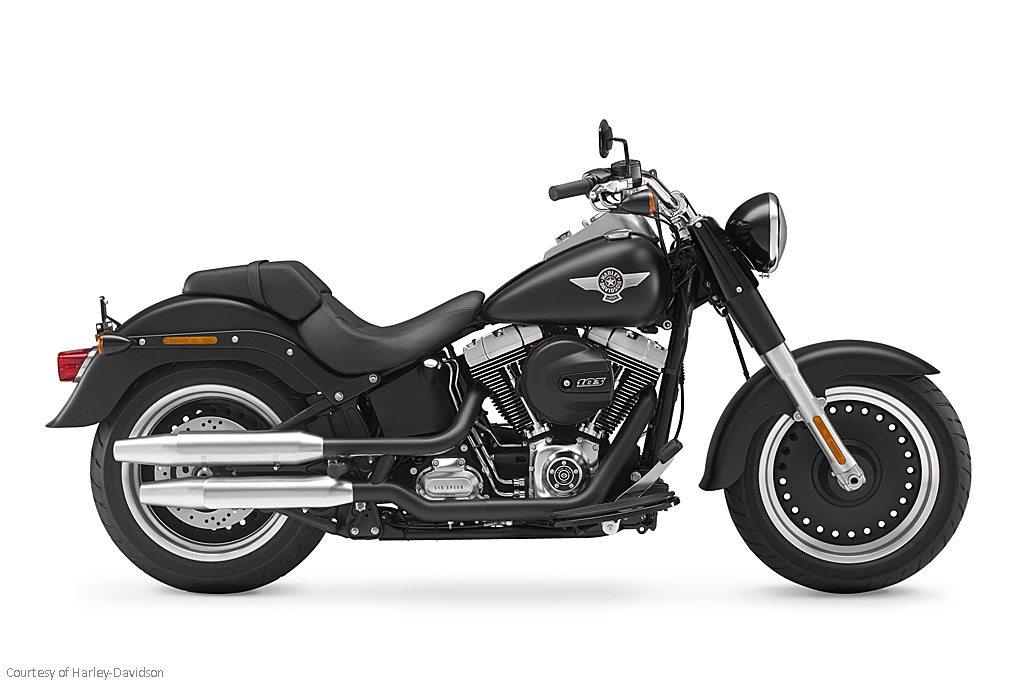

In [3]:
Image("slike/ChopperAndCruiser.jpg", width=500)

#### Enduro And Touring Enduro
položaj voznika: pokončna drža, kar omogoča udobno premagovanje daljših razdalj   
prednosti: vožnja po različnih terenih  
slabosti: višina sedeža 

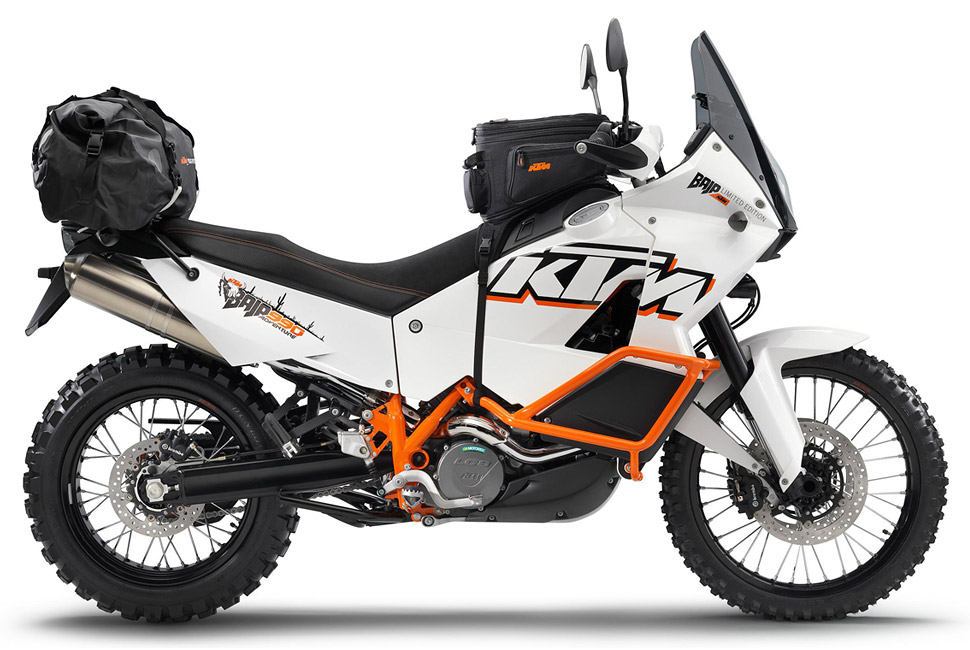

In [4]:
Image("slike/EnduroAndTouringEnduro.jpg", width=500)

#### Naked Bike
položaj voznika: pokončna drža, rahlo pokrčene noge  
prednosti: široko krmilo, vodljiv, primeren za začetnike  
slabosti: pomanjkanje zaščite pred vetrom  

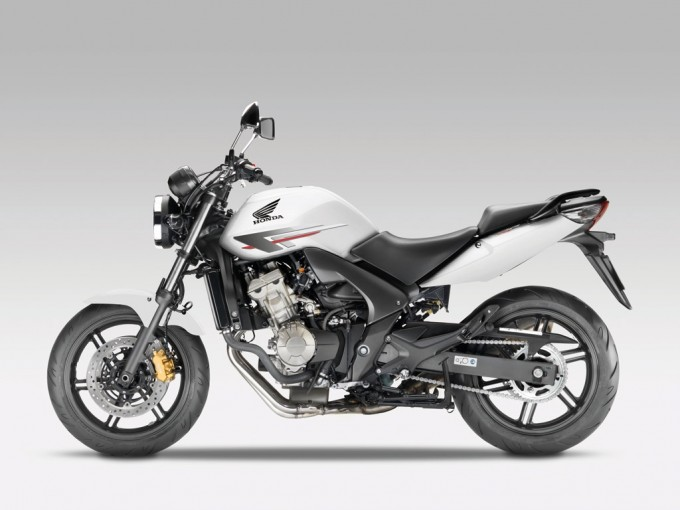

In [5]:
Image("slike/NakedBike.jpg", width=500)

#### Sports And Super Sports Bike
položaj voznika: sključena drža, teža se prenese na roke, noge pokrčene  
prednosti: velika moč, doseganje visokih hitrosti  
slabosti: pri počasni, dolgotrajni vožnji se pojavljajo bolečine v okončinah, vožnja za sopotnika ni ravno udobna  

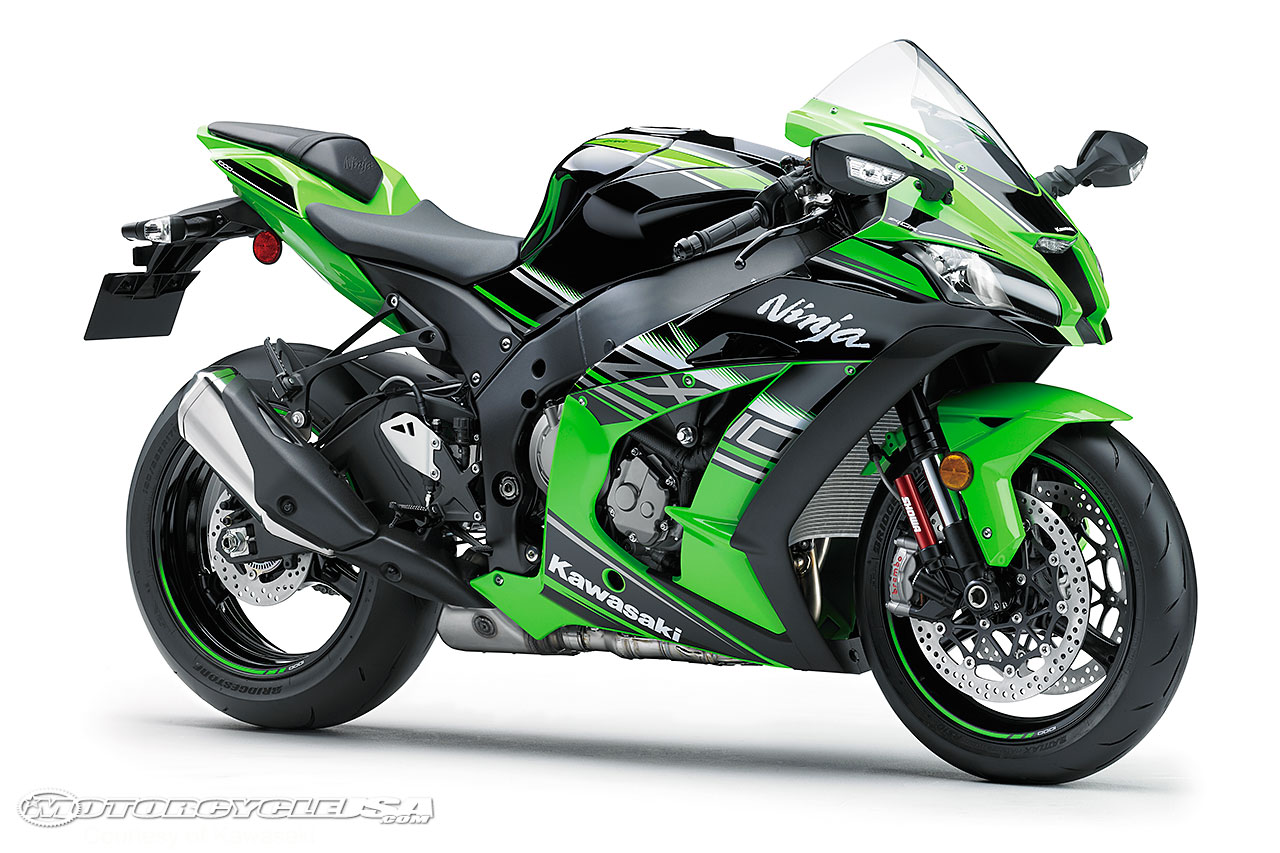

In [6]:
Image("slike/SportsAndSuperSportsBike.jpg", width=500)

#### Sport Touring Motorcycle
položaj voznika: nekoliko bolj pokončen kot pri kategoriji Super Sports    
prednosti: dovolj močan in udoben za daljša potovanja, tudi kadar se pridruži sopotnik in prtljaga  
slabosti: teža, okornost pri manevriranju na mestu

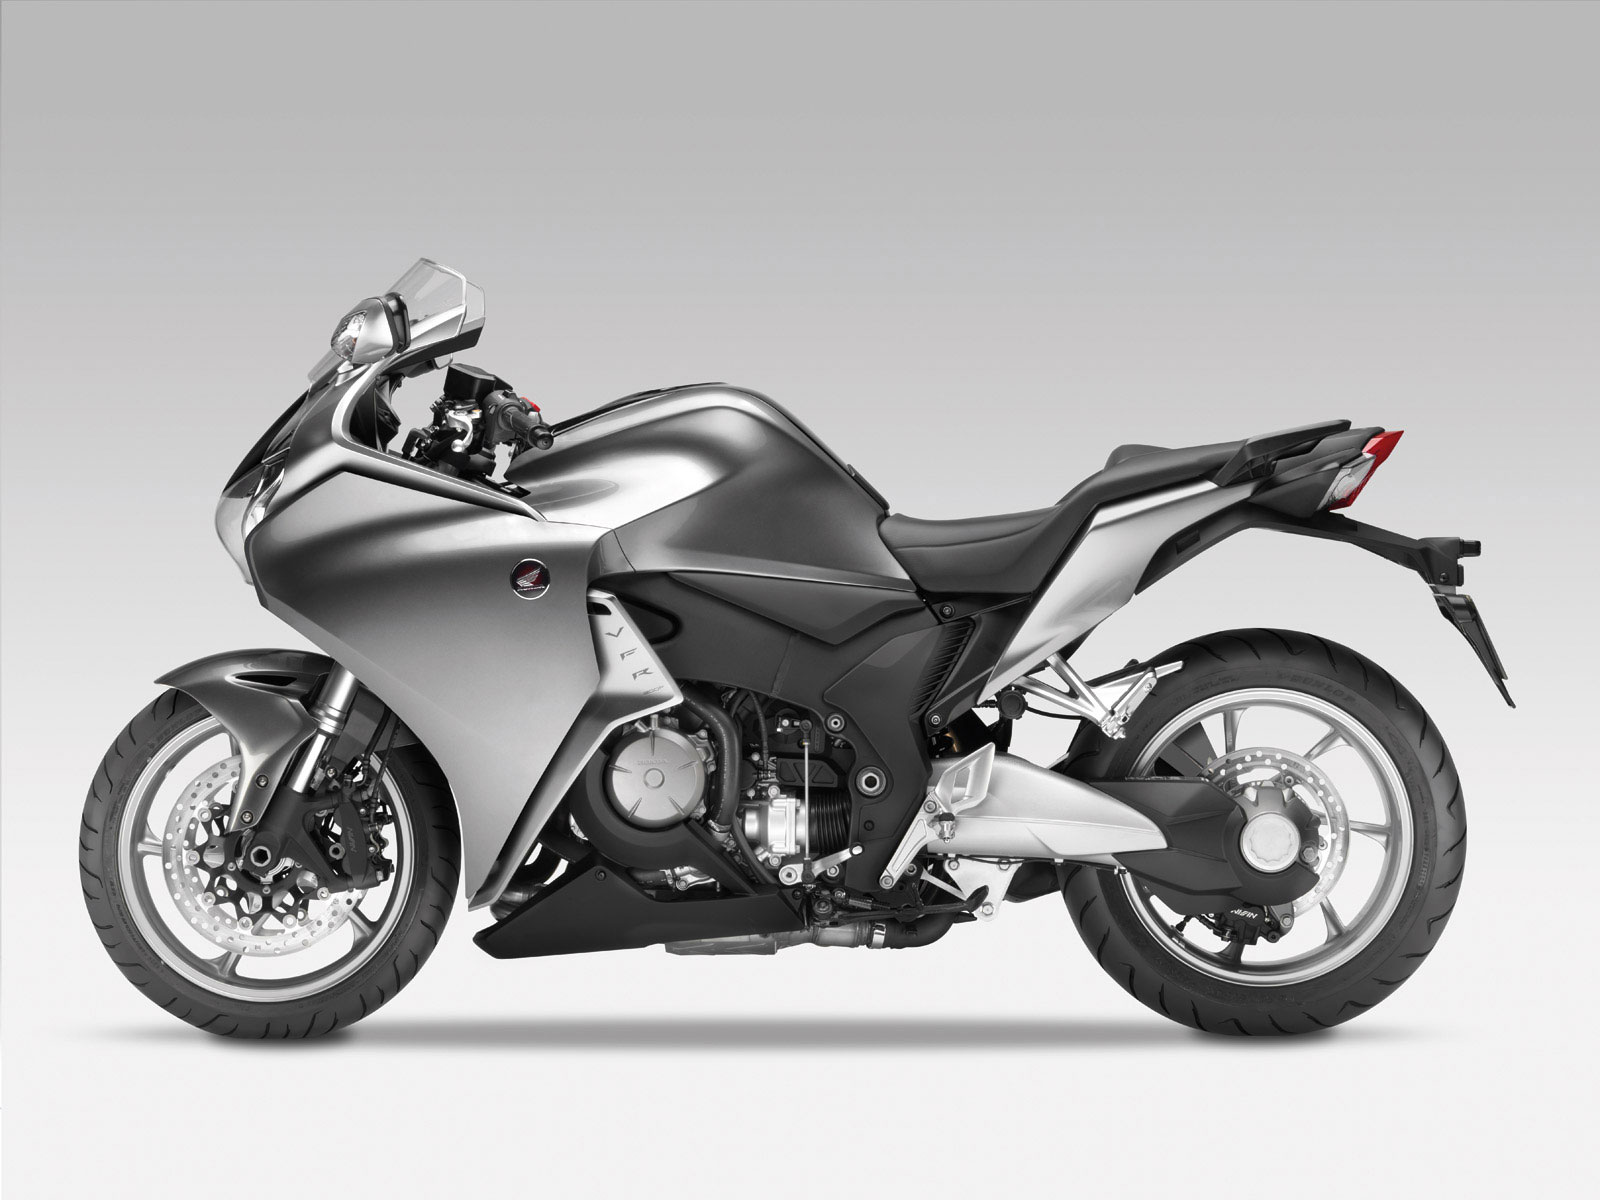

In [7]:
Image("slike/SportTouringMotorcycle.jpg", width=500)

#### Super Moto
položaj voznika: pokončna drža, noge rahlo pokrčene  
prednosti: izjemno vodljiv v ovinkih, široko krmilo, navor  
slabosti: višina sedeža  

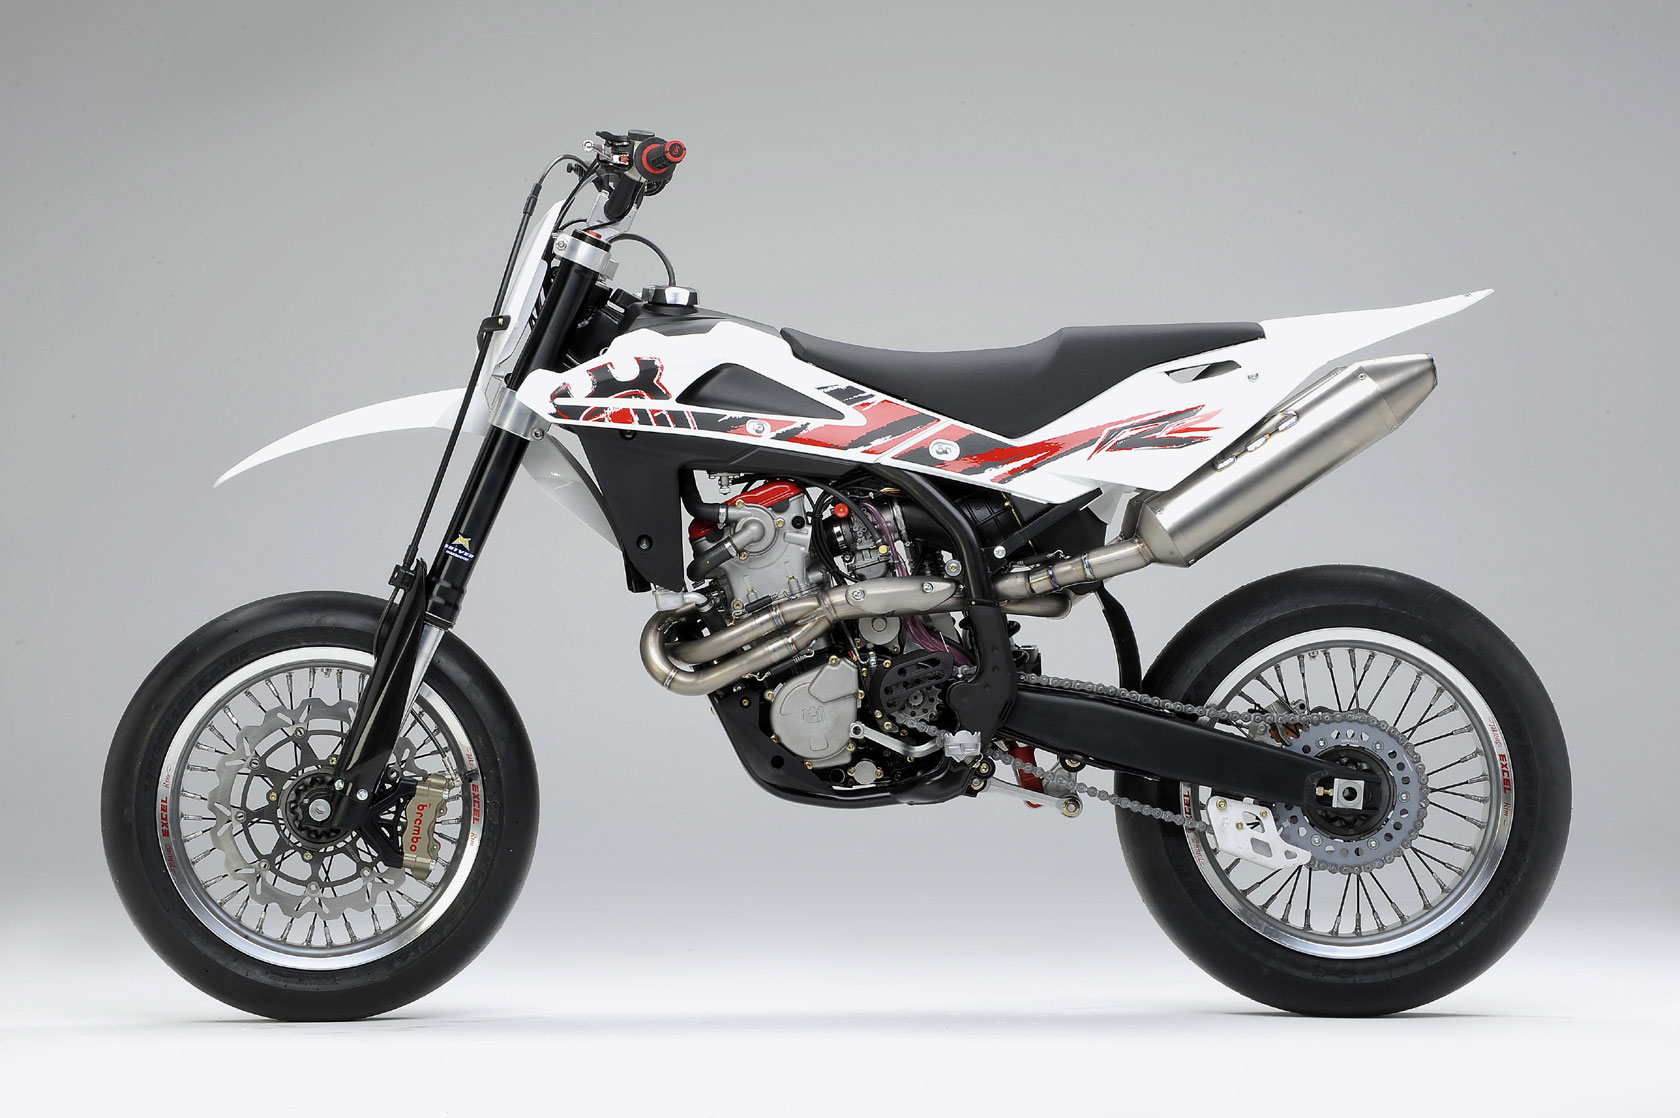

In [8]:
Image("slike/SuperMoto.jpg", width=500)

#### Tourer
položaj voznika: pokončna drža    
prednosti: izjemno udoben na daljših potovanjih  
slabosti: teža, okornost pri manevriranju na mestu

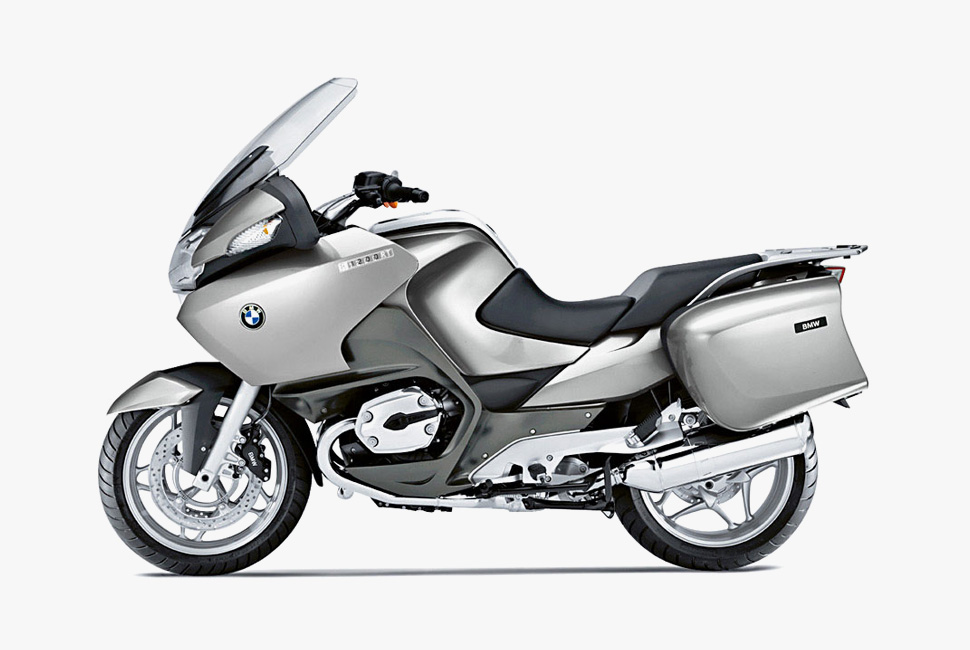

In [9]:
Image("slike/Tourer.jpg", width=500)

Izvirna tabela podatkov:

In [10]:
motocikli = tabela.dropna(how='any')
motocikli

,letnik,znamka,tip,prostornina,moc,km,cena
id,,,,,,,
237662642,2006,Hyosung,Chopper And Cruiser,650,52,16000,2999
237662642,2006,Hyosung,Chopper And Cruiser,647,59,3945,2999
229082730,2006,Yamaha,Chopper And Cruiser,1100,48,54000,3800
231224244,2006,Harley-Davidson,Chopper And Cruiser,1800,85,4500,24500
222950115,2006,Yamaha,Chopper And Cruiser,1100,46,17999,7999
...,...,...,...,...,...,...,...
235939751,2016,Harley-Davidson,Tourer,1690,62,6200,27750
235820343,2016,Harley-Davidson,Tourer,1690,64,9500,27990
233522567,2016,Harley-Davidson,Tourer,1810,68,1090,28900


Poglejmo najprej nekaj povprečnih rezultatov vseh oglasov.

In [11]:
znamke = motocikli['znamka'].value_counts()
znamke

BMW                2849
Harley-Davidson    2093
Honda              1676
Kawasaki           1616
Yamaha             1434
                   ... 
Beta                  1
Horex                 1
Bimota                1
Can                   1
Norton                1
Name: znamka, dtype: int64

In [12]:
motocikli['letnik'].mean()

2011.33567368773

In [13]:
motocikli['km'].mean()

16598.127983951854

In [14]:
motocikli['cena'].mean()

9586.134871280508

In [15]:
motocikli['tip'].value_counts()

Naked Bike                      4067
Chopper And Cruiser             2853
Sports And Super Sports Bike    2607
Enduro And Touring Enduro       2486
Sport Touring Motorcycle        1515
Tourer                           984
Super Moto                       443
Name: tip, dtype: int64

In [16]:
motocikli['moc'].mean()

80.43838181210297

In [17]:
motocikli['prostornina'].mean()

1033.790504847877

Ker nam povprečne vrednosti povedo le zanimive in ne koristnih podatkov, si podatke poglejmo bolj podrobno.

Recimo, da kupujemo motocikel in bi radi svoj denar čim bolje izkoristili. Poglejmo kako cena narašča oziroma pada glede na izbrane parametre.

In [18]:
m = motocikli
m['prostornina'] = m['prostornina'].apply(lambda x: round((x /100), 0) * 100)
m['moc'] = m['moc'].apply(lambda x: round((x /10), 0) * 10)
m['km'] = m['km'].apply(lambda x: round((x /5000), 0) * 5000)

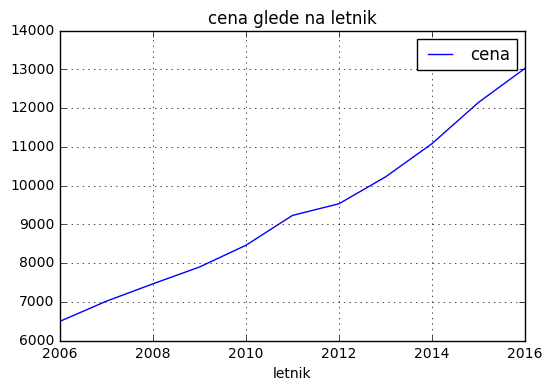

In [19]:
letnik = m.groupby('letnik').mean()
pd.DataFrame(letnik['cena']).plot(kind='line', grid=True, title='cena glede na letnik')

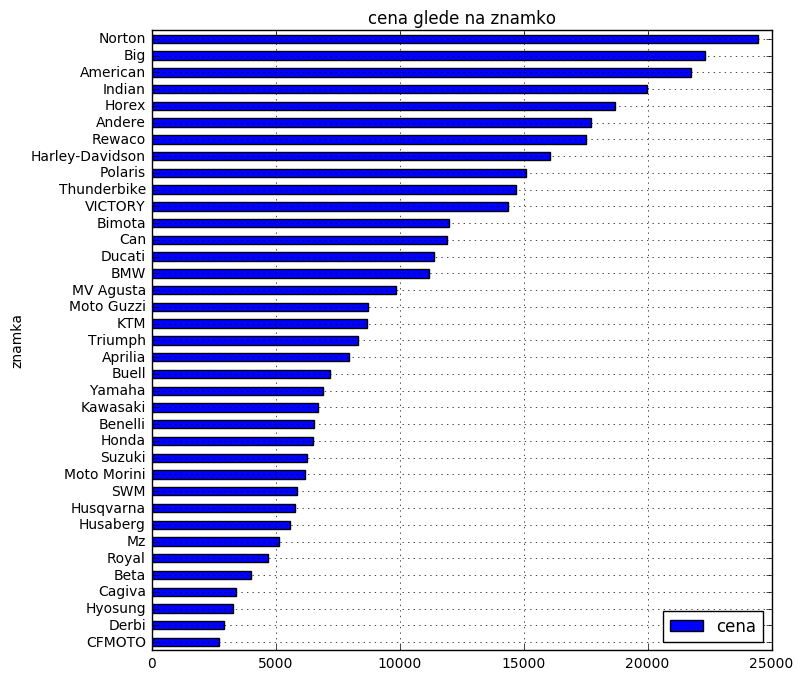

In [20]:
znamka = motocikli.groupby('znamka').mean()
pd.DataFrame(znamka['cena']).sort_values(['cena']).plot(kind='barh', figsize=(8,8), stacked=True, grid=True, title='cena glede na znamko')

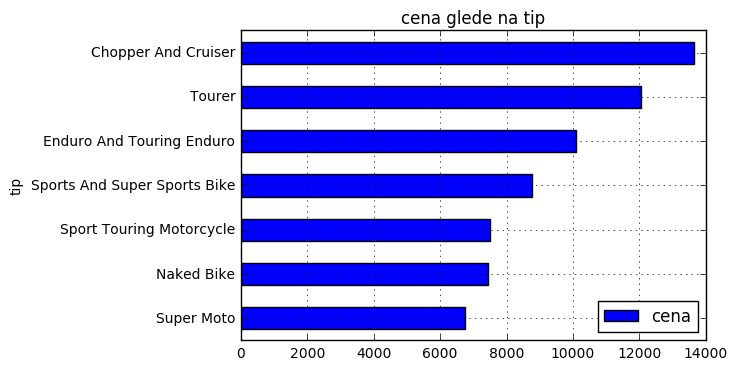

In [21]:
tip = motocikli.groupby('tip').mean()
pd.DataFrame(tip['cena']).sort_values(['cena']).plot(kind='barh', grid=True, title='cena glede na tip')

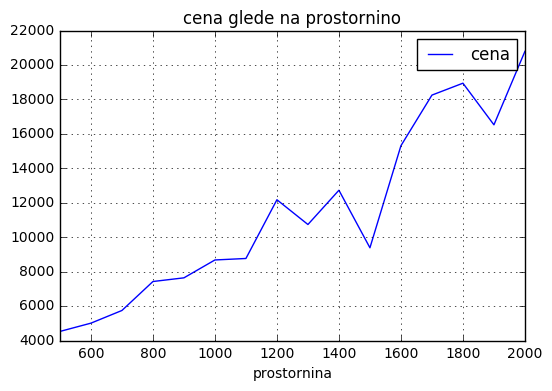

In [22]:
prostornina = m.groupby('prostornina').mean()
pd.DataFrame(prostornina['cena']).plot(kind='line', grid=True, title='cena glede na prostornino')

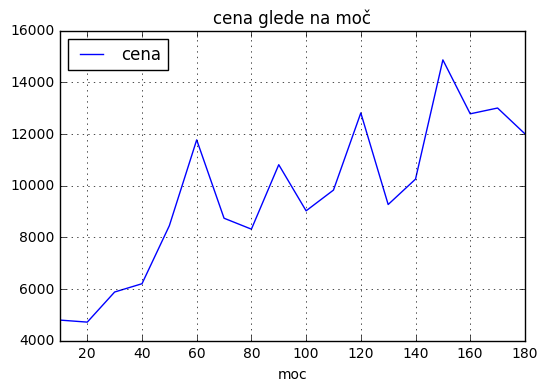

In [23]:
moc = m.groupby('moc').mean()
pd.DataFrame(moc['cena']).plot(kind='line', grid=True, title='cena glede na moč')

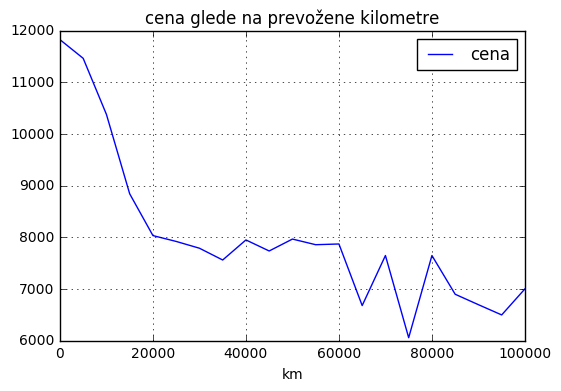

In [24]:
km = m.groupby('km').mean()
pd.DataFrame(km['cena']).plot(kind='line', grid=True, title='cena glede na prevožene kilometre')

Seveda nas poleg cene zanimajo še drugi parametri.

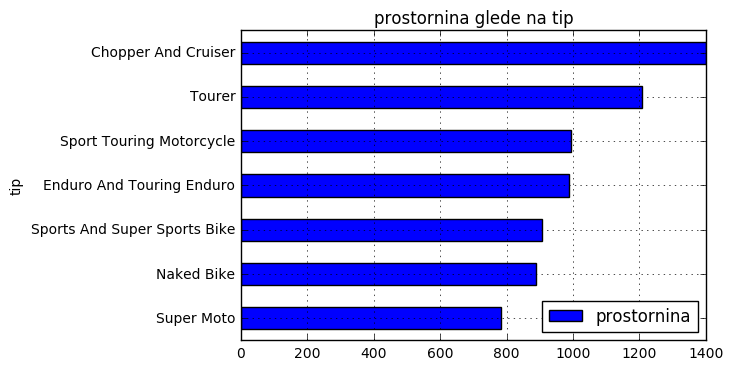

In [25]:
tip_prostornina = m.groupby('tip').mean()
pd.DataFrame(tip_prostornina['prostornina']).sort_values(['prostornina']).plot(kind='barh', grid=True,title='prostornina glede na tip')

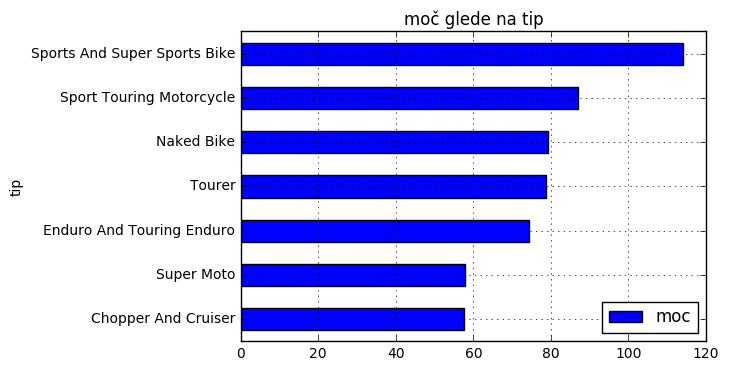

In [26]:
tip_moc = m.groupby('tip').mean()
pd.DataFrame(tip_moc['moc']).sort_values(['moc']).plot(kind='barh', grid=True, title='moč glede na tip')

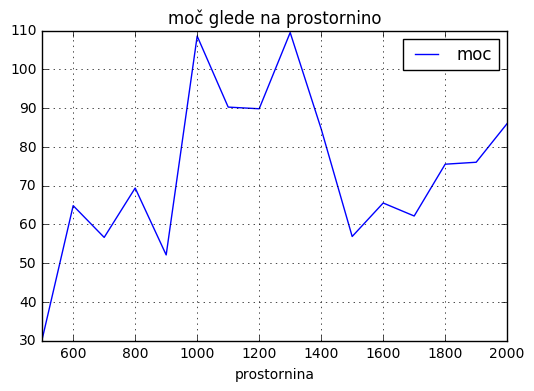

In [27]:
prostornina_moc = m.groupby('prostornina').mean()
pd.DataFrame(prostornina_moc['moc']).plot(kind='line', grid=True, title='moč glede na prostornino')

Vidimo, da večja prostornina ne pomeni nujno večje moči.

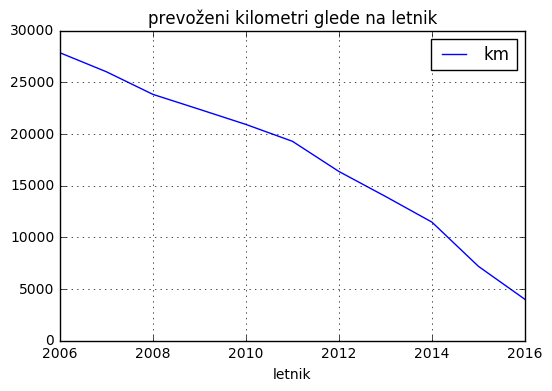

In [28]:
letnik_km = m.groupby('letnik').mean()
pd.DataFrame(letnik_km['km']).plot(kind='line', grid=True, title='prevoženi kilometri glede na letnik')

V nadaljevanju bom analizirala le najbolj pogoste znamke motociklov, torej tiste, za katere obstaja vsaj 500 oglasov.

In [29]:
znamke_stevilo = znamke > 500
p = znamke_stevilo == True
pogoste_znamke = znamke_stevilo[p].index.values.tolist()

Komentar: Harley Davidson izdeluje motocikle, ki jih uvrstimo v kategoriji "Chopper and Cruiser" in "Tourer". Prisotnost znamke v ostalih kategorijah je torej posledica napačne oznake tipa motocikla pri izdelavi oglasa.

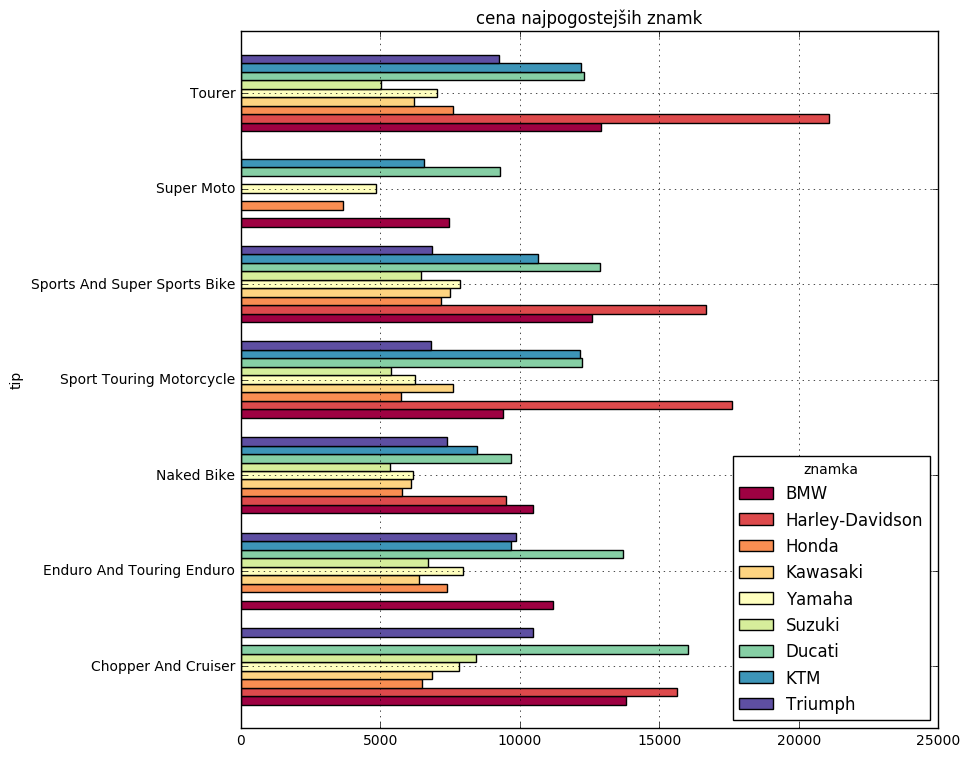

In [30]:
tip_znamka_cena = motocikli.pivot_table(index='tip', columns='znamka', values='cena')
tip_znamka_cena[pogoste_znamke].plot(kind='barh', figsize=(9,9), colormap='Spectral', grid=True, width=0.8, title='cena najpogostejših znamk')

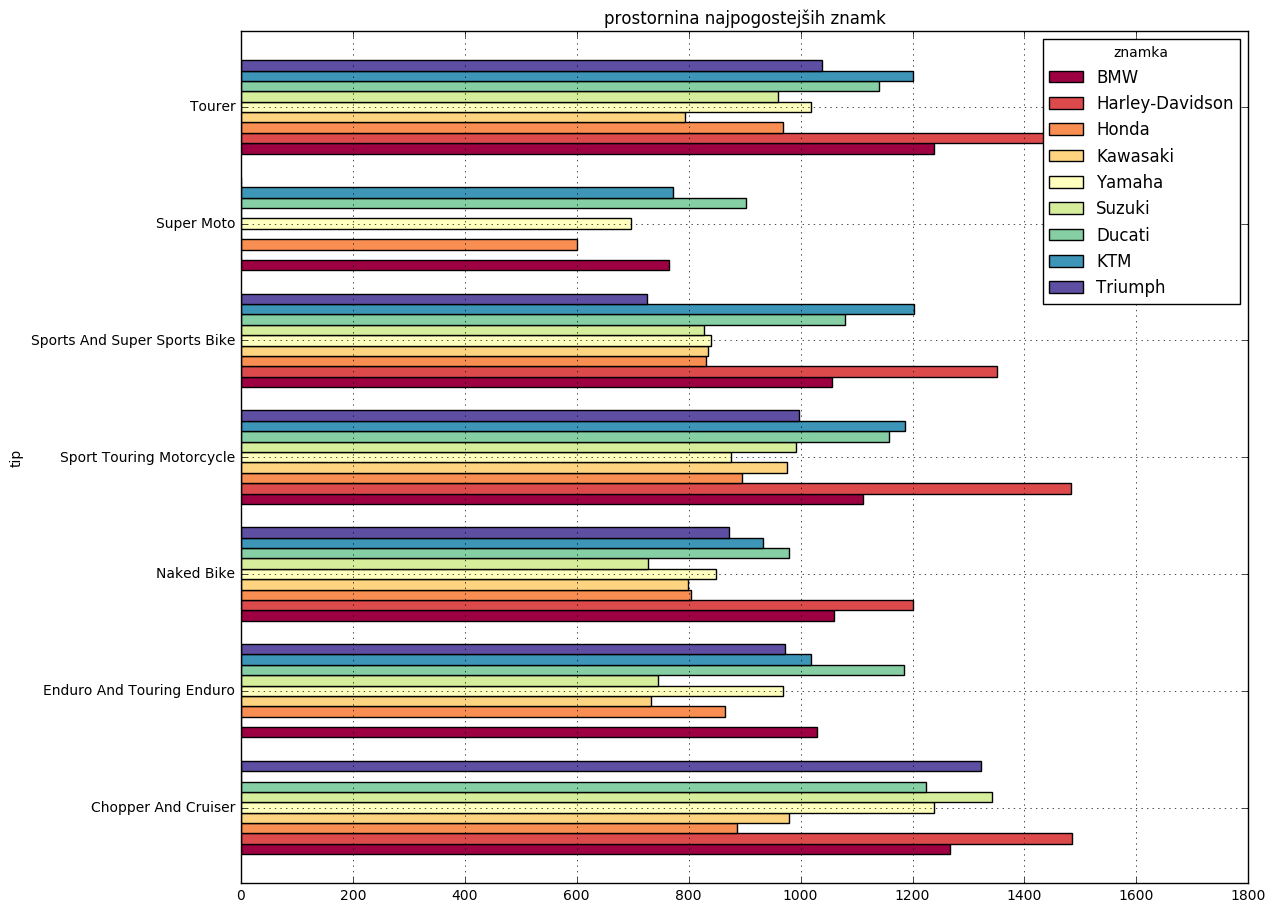

In [31]:
tip_znamka_prostornina = motocikli.pivot_table(index='tip', columns='znamka', values='prostornina')
tip_znamka_prostornina[pogoste_znamke].plot(kind='barh', figsize=(13,11), colormap='Spectral', grid=True, width=0.8, title='prostornina najpogostejših znamk')

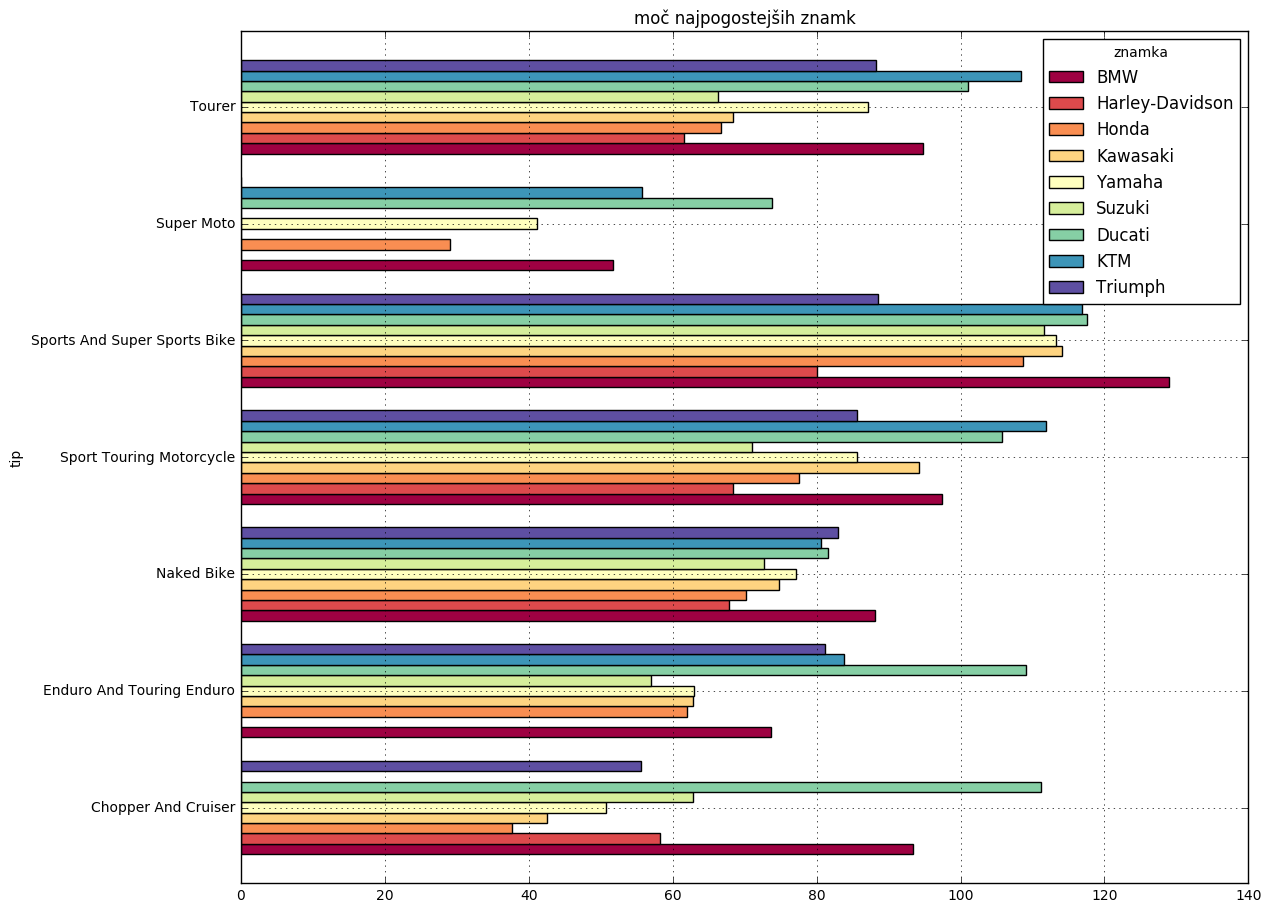

In [32]:
tip_znamka_moc = motocikli.pivot_table(index='tip', columns='znamka', values='moc')
tip_znamka_moc[pogoste_znamke].plot(kind='barh', figsize=(13,11), colormap='Spectral', grid=True, width=0.8, title='moč najpogostejših znamk')

Naslednji graf prikazuje razmerje med močjo in prostornino pogonskega agregata. Vidimo tudi, kako se razmerje razlikuje glede na tip motocikla. Majhna vrednost torej pomeni, da je prostornina precej večja od moči.

In [34]:
motocikli['razmerje'] = motocikli['moc'] / motocikli['prostornina']

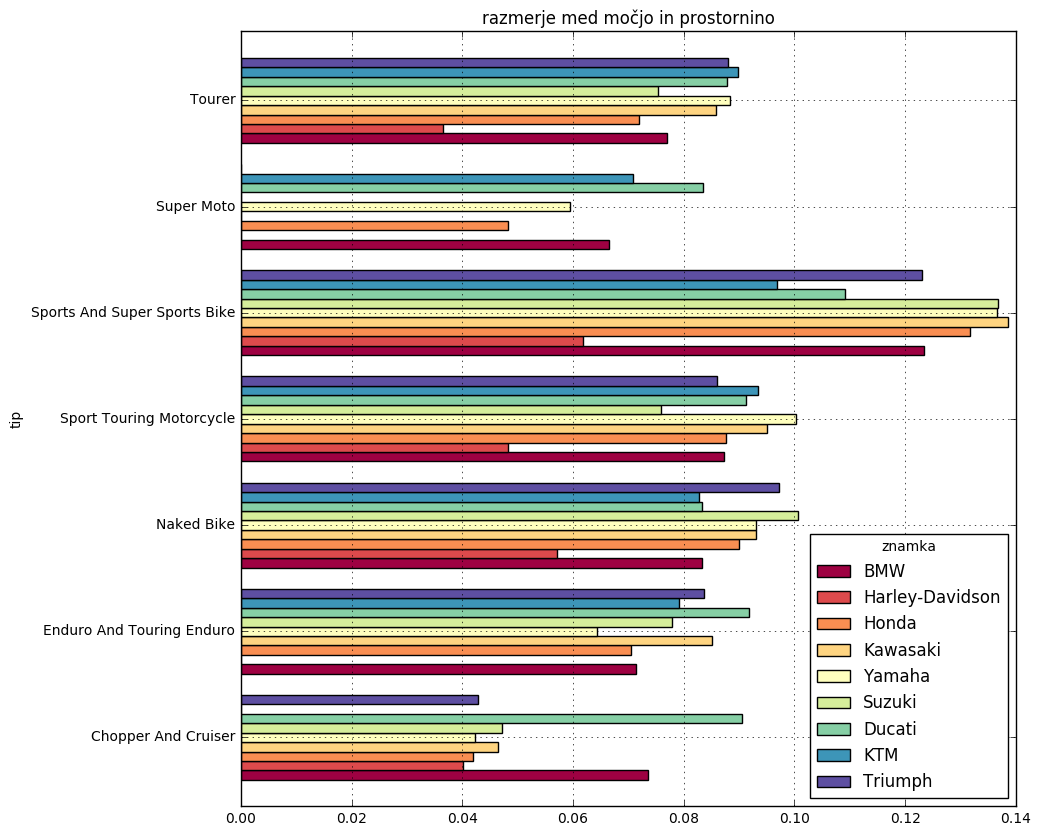

In [35]:
tip_znamka_moc = motocikli.pivot_table(index='tip', columns='znamka', values='razmerje')
tip_znamka_moc[pogoste_znamke].plot(kind='barh', figsize=(10,10), colormap='Spectral', grid=True, width=0.8, title='razmerje med močjo in prostornino')

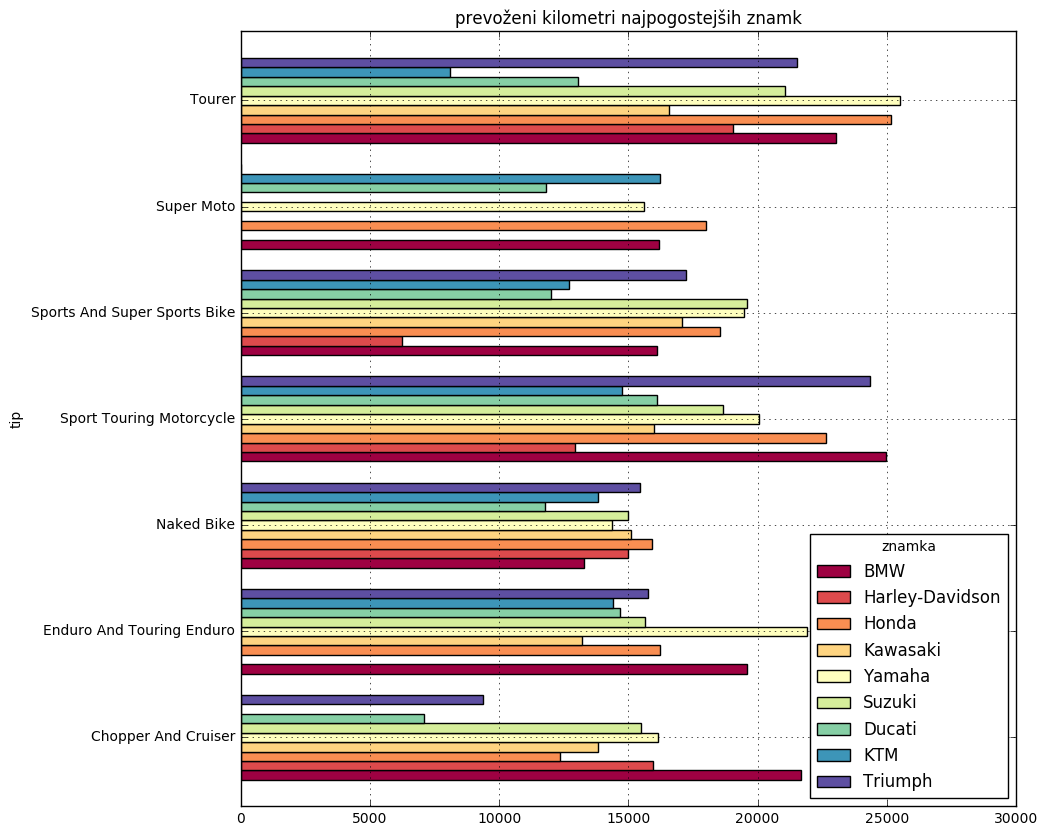

In [36]:
tip_znamka_km = motocikli.pivot_table(index='tip', columns='znamka', values='km')
tip_znamka_km[pogoste_znamke].plot(kind='barh', figsize=(10,10), colormap='Spectral', grid=True, width=0.8, title='prevoženi kilometri najpogostejših znamk')